In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM, Dense 

In [2]:
data=pd.read_excel('C:/Users/hatice.kocabas/Desktop/Demir Cevheri Fiyat Tahmini/data_v4.xlsx')

In [3]:
data.shape

(2715, 10)

In [5]:
data.head(20)

,Date,Demir Cevheri Fiyatı,Brent Petrol Fiyatı,Dolar Alış,Dolar Satış,TÜFE (Yıllık % Değişim),TÜFE (Aylık % Değişim),Vale3_Borsa_Değerleri,BHP Group Borsa verileri,ÇİN (TÜFE) (Yıllık)
0,2014-01-02,133.33,107.78,2.1304,2.1343,7.75,1.98,21.08,29.547,0.025
1,2014-01-03,132.71,106.89,2.1718,2.1757,7.75,1.98,20.47,29.214,0.025
2,2014-01-06,132.18,106.73,2.1687,2.1726,7.75,1.98,20.64,29.052,0.025
3,2014-01-07,132.02,107.35,2.1878,2.1918,7.75,1.98,20.13,28.781,0.025
4,2014-01-08,131.93,107.15,2.1723,2.1762,7.75,1.98,20.27,28.650,0.025
5,2014-01-09,130.91,106.39,2.1757,2.1796,7.75,1.98,19.55,28.595,0.025
6,2014-01-10,130.82,107.25,2.1845,2.1884,7.75,1.98,19.53,28.185,0.025
7,2014-01-13,130.63,106.75,2.1760,2.1800,7.75,1.98,19.40,28.278,0.025
8,2014-01-14,131.01,106.39,2.1719,2.1759,7.75,1.98,19.39,27.953,0.025
9,2014-01-15,130.89,107.13,2.1909,2.1949,7.75,1.98,19.65,27.791,0.025


In [24]:
data.tail()

,Date,Demir Cevheri Fiyatı,Brent Petrol Fiyatı,Dolar Alış,Dolar Satış,TÜFE (Yıllık % Değişim),TÜFE (Aylık % Değişim),Vale3_Borsa_Değerleri,BHP Group Borsa verileri,ÇİN (TÜFE) (Yıllık)
2710,2024-10-14,107.11,77.46,34.1625,34.2241,NaN,NaN,61.93,43.80,0.004
2711,2024-10-15,106.63,74.25,34.2034,34.2650,NaN,NaN,61.17,44.01,0.004
2712,2024-10-16,106.20,74.22,34.2018,34.2634,NaN,NaN,62.34,43.54,0.004
2713,2024-10-17,105.36,74.45,34.1633,34.2248,NaN,NaN,60.76,42.99,0.004
2714,2024-10-18,105.37,73.06,34.1155,34.1769,NaN,NaN,60.55,42.06,0.004


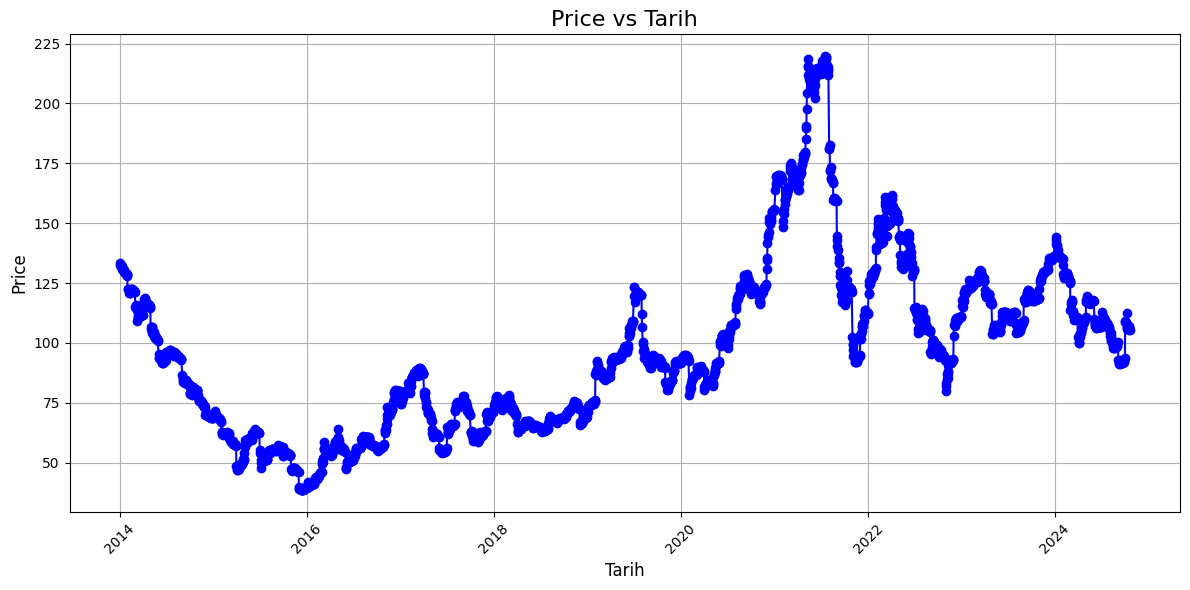

In [25]:
plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Demir Cevheri Fiyatı'], marker='o', linestyle='-', color='b')

plt.title("Price vs Tarih", fontsize=16)
plt.xlabel("Tarih", fontsize=12)
plt.ylabel("Price", fontsize=12)

plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

In [26]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

data.isnull().sum()

Demir Cevheri Fiyatı          0
Brent Petrol Fiyatı           0
Dolar Alış                   94
Dolar Satış                  94
TÜFE (Yıllık % Değişim)      14
TÜFE (Aylık % Değişim)       14
Vale3_Borsa_Değerleri       106
BHP Group Borsa verileri     49
ÇİN (TÜFE) (Yıllık)           0
dtype: int64

In [27]:
data['Dolar Alış '] = data['Dolar Alış '].ffill()
data['Dolar Satış'] = data['Dolar Satış'].ffill()
data['TÜFE (Yıllık % Değişim)'] = data['TÜFE (Yıllık % Değişim)'].ffill()
data['TÜFE (Aylık % Değişim)'] = data['TÜFE (Aylık % Değişim)'].ffill()
data['Vale3_Borsa_Değerleri'] = data['Vale3_Borsa_Değerleri'].ffill()
data['BHP Group Borsa verileri'] = data['BHP Group Borsa verileri'].bfill()


In [ ]:
correlation_matrix = data.corr()

target_correlation = correlation_matrix['Demir Cevheri Fiyatı']
print(target_correlation)

Demir Cevheri Fiyatı        1.000000
Brent Petrol Fiyatı         0.420864
Dolar Alış                  0.412920
Dolar Satış                 0.412920
TÜFE (Yıllık % Değişim)     0.400857
TÜFE (Aylık % Değişim)      0.337225
Vale3_Borsa_Değerleri       0.848409
BHP Group Borsa verileri    0.795381
ÇİN (TÜFE) (Yıllık)        -0.330530
Name: Demir Cevheri Fiyatı, dtype: float64


In [29]:
target = 'Demir Cevheri Fiyatı'
features = data.drop(columns=[target])
target_data = data[[target]]

scaler = MinMaxScaler(feature_range=(0, 1))

scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target_data)

In [30]:
def create_dataset(features, target, time_step=1):
    X, y = [], []
    for i in range(len(features) - time_step - 1):
        X.append(np.hstack((features[i:(i + time_step)], target[i:(i + time_step)])))
        y.append(target[i + time_step])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_features, scaled_target, time_step)



In [31]:
split_index = int(len(X) * 0.8) 
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


In [32]:
num_features = X_train.shape[2]

In [33]:
num_features

9

In [34]:
model = Sequential()
model.add(LSTM(units=5, input_shape=(time_step, num_features)))
model.add(Dense(units=1))

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

lstm_model = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/150


c:\Users\hatice.kocabas\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0264 - val_loss: 0.1577
Epoch 2/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0058 - val_loss: 0.0967
Epoch 3/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0038 - val_loss: 0.0830
Epoch 4/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - val_loss: 0.0851
Epoch 5/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - val_loss: 0.0891
Epoch 6/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019 - val_loss: 0.0812
Epoch 7/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015 - val_loss: 0.0780
Epoch 8/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012 - val_loss: 0.0694
Epoch 9/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - val_loss: 0.0609
Epoch 10/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.0578e-04 - val_loss: 0.0564
Epoch 11/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.6464e-04 - val_loss: 0.0537
Epoch 12/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.4068e

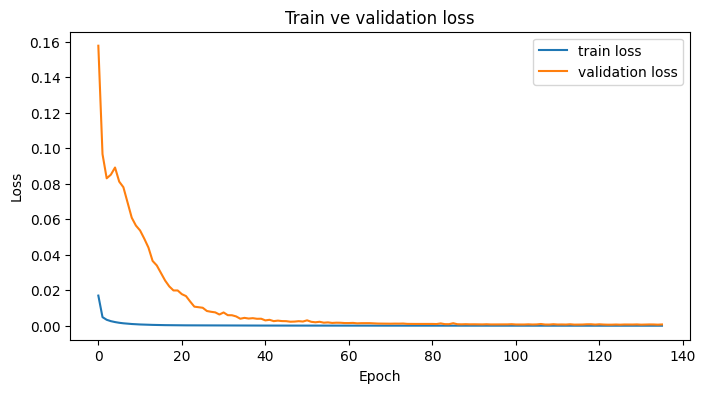

In [35]:
plt.figure(figsize=(8, 4))
plt.plot(lstm_model.history['loss'], label='train loss')
plt.plot(lstm_model.history['val_loss'], label='validation loss')
plt.title('Train ve validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [36]:
from sklearn.metrics import mean_squared_error

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))

print("Eğitim RMSE: ", train_rmse)
print("Test RMSE: ", test_rmse)

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Eğitim RMSE:  0.013786542639970546
Test RMSE:  0.027916123989949075


In [37]:
mae = mean_absolute_error(y_test, test_predict)
mae

0.01997324384491019

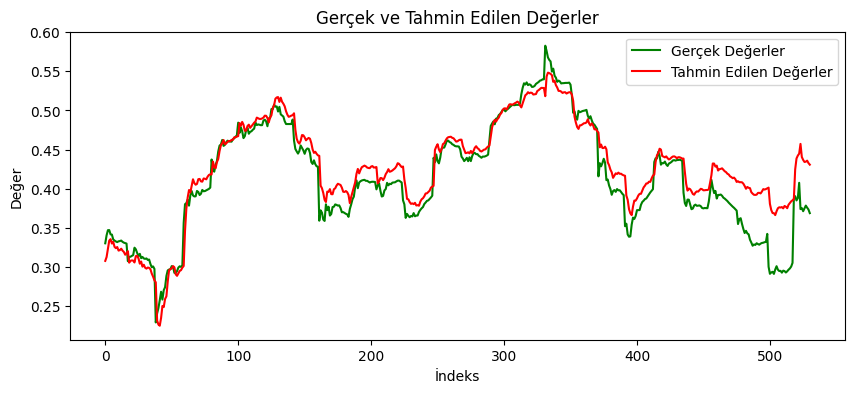

In [ ]:

x = np.arange(len(y_test)) 

plt.figure(figsize=(10, 4))
plt.plot(x, y_test, label='Gerçek Değerler', color='green', marker=' ')
plt.plot(x, test_predict, label='Tahmin Edilen Değerler', color='red', marker=' ')
plt.title('Gerçek ve Tahmin Edilen Değerler')
plt.xlabel('İndeks')
plt.ylabel('Değer')
plt.legend()
plt.show()
